<h1><b>LOGISTIC REGRESSION (CLASSIFICATION) USING NUMPY</b></h1>

In [2]:
import numpy as np 

In [3]:
np.random.seed(42)

putting a seed cause we dont want to get random numbers every time we compile during the same example

In [4]:
def generate_dataset(num_samples=100, num_features=2): 
    X = np.random.rand(num_samples, num_features)*10
    #random features in range [0 to 10] of 100X2 matrix
    weights = np.random.rand(num_features) #random true weights
    bias = np.random.randn() #random true bias - mean=0, std=1
    linear_combination = np.dot(X, weights) + bias #y=mx+c=wx+b
    y = (linear_combination>np.median(linear_combination)).astype(int) # binary labels
    return X,y

num_samples are number of data instances we have
and num_featueres are number of features we have

weights are how much of a feature X we got to consider
and bias is the base number of every sample

linear_combination is a line eqn as y=mx+c or y=wx+b

y-> training output data 
changing them to binary(0/1) of having the choosing thing as median of the numbers
if less than medium 0, if more 1

In [5]:
def sigmoid(z): 
    return 1/(1+np.exp(-z))

sigmoid function of 1/1-e^(z)

In [6]:
def feature_scaling(X):
    return (X-X.mean(axis=0))/X.std(axis=0)

scaling all the features down by stnadard mean scaling
Ensures better convergence during gradient descent.

In [7]:
def logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    bias = 0

    for i in range(num_iterations):
        linear_model = np.dot(X, weights) + bias
        predictions = sigmoid(linear_model)

        dw = (1/num_samples)* np.dot(X.T, (predictions-y))
        db = (1/num_samples)* np.sum(predictions - y) 

        weights -= learning_rate*dw
        bias -= learning_rate*db

        if i%100 == 0:
            loss = -np.mean(y*np.log(predictions+1e-15) + (1-y)*np.log(1- predictions + 1e-15))
            print(f"iteration {i}: loss = {loss:.4f}")

    return weights, bias

logistic_regression our model
learning_rate = alpha on how much we got to descent the feature values
num_iterations say how many times we gotta do the process

we do the line and sigmoid and dw,db and also change weights, bias accordingly 
last count the loss by binary cross entropy method [ylog(f-yhat)+(1-yhat)log(1-yhat)]

return the weights and bias at last (w&b)

Initialization: Set weights and bias to zero.

Forward Pass: Compute predictions by applying the sigmoid function to the linear model.

Backpropagation: Calculate gradients of the loss function with respect to weights and bias.

Update: Adjust weights and bias using the calculated gradients and learning rate.

In [8]:
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    predictions = sigmoid(linear_model)
    return (predictions>=0.5).astype(int)

predict using linear_model and predictions and return yhat by threshold needs

In [9]:
if __name__ == "__main__":
    X, y = generate_dataset()
    X = feature_scaling(X)
    weights, bias = logistic_regression(X, y, learning_rate=0.1, num_iterations=1000)
    predictions = predict(X, weights, bias)

    accuracy = np.mean(predictions==y)
    print(f"the accuracy is: {accuracy :.2f}%")

iteration 0: loss = 0.6931
iteration 100: loss = 0.2105
iteration 200: loss = 0.1490
iteration 300: loss = 0.1223
iteration 400: loss = 0.1066
iteration 500: loss = 0.0959
iteration 600: loss = 0.0881
iteration 700: loss = 0.0819
iteration 800: loss = 0.0770
iteration 900: loss = 0.0729
the accuracy is: 0.99%


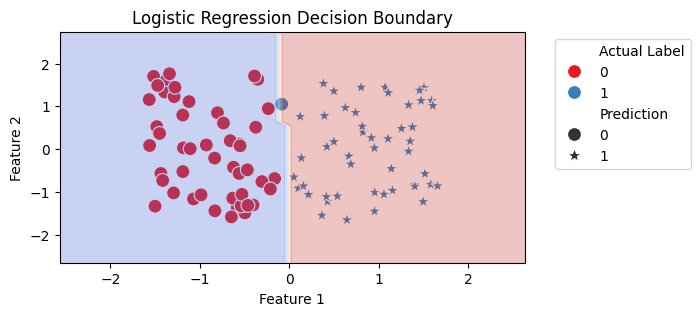

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Actual Label'] = y
df['Prediction'] = predictions

# Plotting the data
plt.figure(figsize=(6, 3))
sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='Actual Label', palette='Set1', style='Prediction', markers=["o", "*"], s=100)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = predict(np.c_[xx.ravel(), yy.ravel()], weights, bias)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()